# Logistic Regression notebook

What is logistic regression
[Check out this video](https://www.youtube.com/watch?v=yIYKR4sgzI8)


## First we have to generate the data we will be using logistic regression on

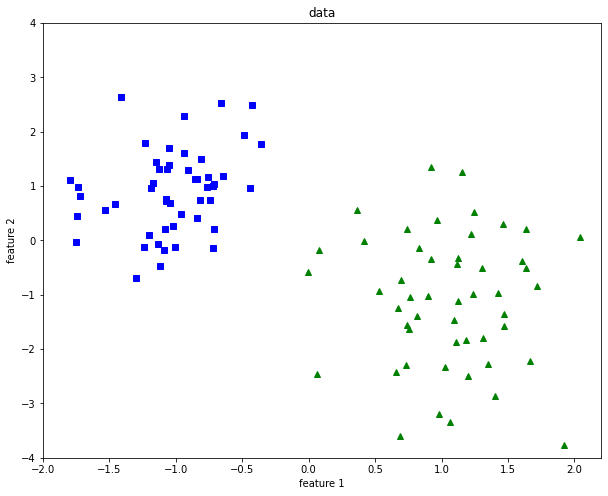

In [9]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=8, 
                           n_clusters_per_class=1)

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("data")
xmin, xmax = -2, 2.2
ymin, ymax = -4, 4
plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax)
plt.show()

# Next we need to look at the sigmoid function which is used for classification because it can map any real number to either zero or one.

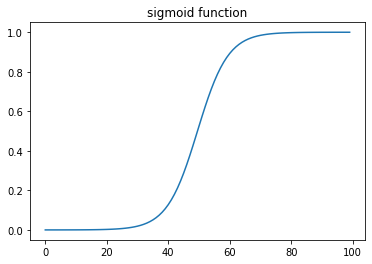

In [10]:
import numpy as np

def sigmoid(z):
    # sigmoid function needed for regression
    return 1.0/(1 + np.exp(-z))

array = np.linspace(-10,10,100)
sig_array = sigmoid(array)
plt.plot(sig_array)
plt.title("sigmoid function")
plt.show()

# Next we need to define our cost/loss function. This function is what we will use to determine how good the fit our of model currently is. Our goal is to find parameters which make the lowest cost. We can find this parameters by using gradient descent.

In [11]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

# Another important step is normalizing the data which is what this function does.

In [12]:
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

# This next function sets up the model and uses the function we defined above to find the best parameters.

In [13]:
def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses



# This function is to visualize how how our model did

In [14]:
def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    xmin, xmax = -2, 2.2
    ymin, ymax = -4, 4
    xd = np.array([xmin, xmax])
    yd = m*xd + c
    fig = plt.figure(figsize=(10,8))
    plt.ylim(ymin,ymax)
    plt.xlim(xmin,xmax)
    plt.plot(xd, yd, 'k', lw=1, ls='--')
    plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
    plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')
    plt.show()

# Lets try out the model. First lets only run the model for 5 epochs. We can see that the model did an alright job but we can visually see that the model could be better. Next lets try increasing the epochs and seeing if things can get better.

<Figure size 720x576 with 0 Axes>

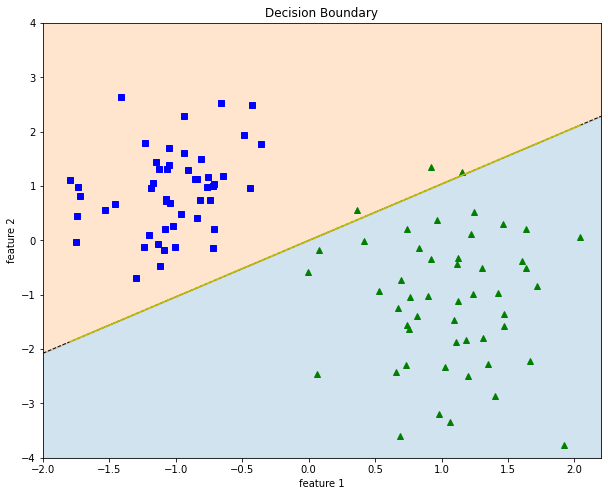

In [15]:
# running the model
w, b, l_epoch_5 = train(X, y, bs=100, epochs=5, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

# Now this looks a lot better

<Figure size 720x576 with 0 Axes>

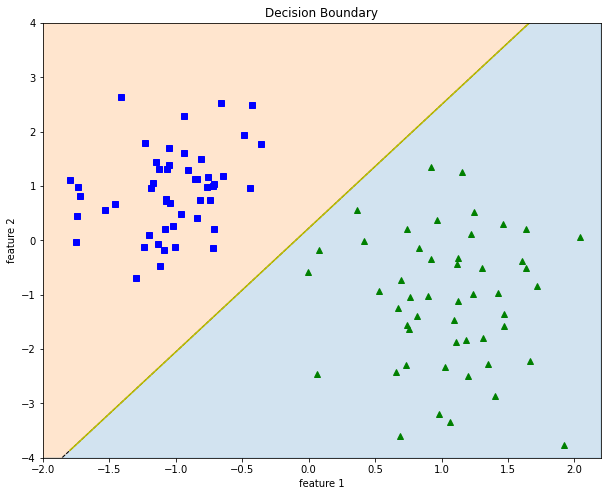

In [16]:
# running the model
w, b, l_epochs_5000 = train(X, y, bs=100, epochs=5000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

# We can look at the loss of both of these models and see that the model that was given more epochs to run was able to come up with a lower loss. We can also visualize the loss as the model is going.

The lost of a model ran with 5 epochs is 0.001190075865777983
The lost of a model ran with 5000 epochs is 0.007171315898448533


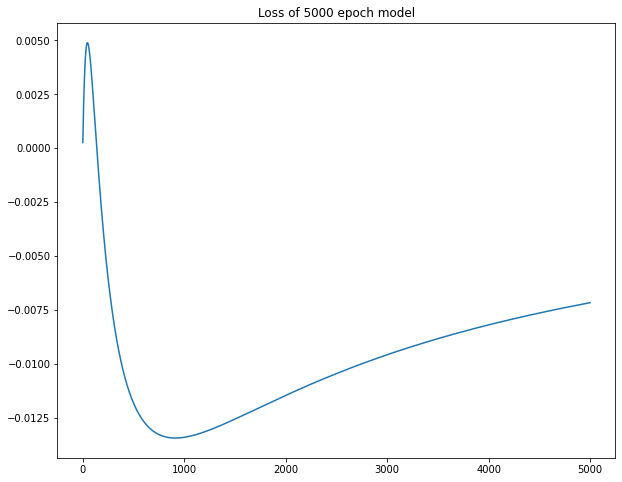

In [17]:
print('The lost of a model ran with 5 epochs is {}'.format(abs(l_epoch_5[4]))) # most recent loss found 4 cause python is 0 index
print('The lost of a model ran with 5000 epochs is {}'.format(abs(l_epochs_5000[4999])))

fig = plt.figure(figsize=(10,8))
plt.title('Loss of 5000 epoch model')
plt.plot(l_epochs_5000)
plt.show()